# Supervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of supervised learning model evaluation.

In [63]:
import warnings
warnings.simplefilter('ignore')
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

## Regression Model Evaluation

In [12]:
from sklearn.datasets import load_boston

data = load_boston()

X = pd.DataFrame(data["data"], columns=data["feature_names"])
y = pd.DataFrame(data["target"], columns=['MEDV'])
data = pd.concat([X, y], axis=1)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## 1. Split this data set into training (80%) and testing (20%) sets.

The `MEDV` field represents the median value of owner-occupied homes (in $1000's) and is the target variable that we will want to predict.

In [15]:
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=42)

## 2. Train a `LinearRegression` model on this data set and generate predictions on both the training and the testing set.

In [17]:
linreg_model=LinearRegression(fit_intercept=True, n_jobs=-1)
linreg_model.fit(X_train, y_train)
y_pred_train=linreg_model.predict(X_train)

In [18]:
linreg_model.fit(X_test, y_test)
y_pred_test=linreg_model.predict(X_test)

## 3. Calculate and print R-squared for both the training and the testing set.

In [19]:
r2_score(y_train, y_pred_train),r2_score(y_test, y_pred_test)

(0.7508856358979672, 0.7655518703858036)

## 4. Calculate and print mean squared error for both the training and the testing set.

In [21]:
mean_squared_error(y_train, y_pred_train),mean_squared_error(y_test, y_pred_test)

(21.641412753226316, 17.192968299470767)

## 5. Calculate and print mean absolute error for both the training and the testing set.

In [23]:
mean_absolute_error(y_train,y_pred_train),mean_absolute_error(y_test,y_pred_test)

(3.3147716267832243, 2.9230240882526686)

## Classification Model Evaluation

In [26]:
from sklearn.datasets import load_iris

data = load_iris()

X = pd.DataFrame(data["data"], columns=data["feature_names"])
y = pd.DataFrame(data["target"], columns=["class"])

data = pd.concat([X, y], axis=1)
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## 6. Split this data set into training (80%) and testing (20%) sets.

The `class` field represents the type of flower and is the target variable that we will want to predict.

In [28]:
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=42)

## 7. Train a `LogisticRegression` model on this data set and generate predictions on both the training and the testing set.

In [45]:
#https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8
#https://towardsdatascience.com/logistic-regression-using-python-sklearn-numpy-mnist-handwriting-recognition-matplotlib-a6b31e2b166a
logreg=LogisticRegression(C=0.01, penalty='l2', tol=0.0001, max_iter=70, solver='lbfgs', multi_class='multinomial')
logreg.fit(X_train,y_train)
y_pred_train=logreg.predict(X_train)

In [46]:
logreg.fit(X_test,y_test)
y_pred_test=logreg.predict(X_test)

## 8. Calculate and print the accuracy score for both the training and the testing set.

In [36]:
#exactitud
accuracy_score(y_train,y_pred_train),accuracy_score(y_test,y_pred_test)

(0.875, 0.7)

## 9. Calculate and print the balanced accuracy score for both the training and the testing set.

In [38]:
#exactitud balanceada
balanced_accuracy_score(y_train,y_pred_train),balanced_accuracy_score(y_test,y_pred_test)

(0.8776318532416094, 0.6666666666666666)

## 10. Calculate and print the precision score for both the training and the testing set.

In [59]:
print("\t\t\tTRAIN\t\tTEST")
print("Micro:\t\t",precision_score(y_train,y_pred_train,average='micro'),",\t\t",precision_score(y_test,y_pred_test,average='micro'))
print("Macro:\t\t",precision_score(y_train,y_pred_train,average='macro'),",",precision_score(y_test,y_pred_test,average='macro'))
print("Weighted:\t",precision_score(y_train,y_pred_train,average='weighted'),",",precision_score(y_test,y_pred_test,average='weighted'))
print("None:\t\t",precision_score(y_train,y_pred_train,average=None),",",precision_score(y_test,y_pred_test,average=None))

			TRAIN		TEST
Micro:		 0.875 ,		 0.7
Macro:		 0.8949978365329873 , 0.49601275917065396
Weighted:	 0.896824400491904 , 0.5153110047846889
None:		 [0.97560976 0.96428571 0.74509804] , [0.90909091 0.         0.57894737]


## 11. Calculate and print the recall score for both the training and the testing set.

In [60]:
print("\t\t\tTRAIN\t\tTEST")
print("Micro:\t\t",recall_score(y_train,y_pred_train,average='micro'),",\t\t",recall_score(y_test,y_pred_test,average='micro'))
print("Macro:\t\t",recall_score(y_train,y_pred_train,average='macro'),",",recall_score(y_test,y_pred_test,average='macro'))
print("Weighted:\t",recall_score(y_train,y_pred_train,average='weighted'),",",recall_score(y_test,y_pred_test,average='weighted'))
print("None:\t\t",recall_score(y_train,y_pred_train,average=None),",",recall_score(y_test,y_pred_test,average=None))

			TRAIN		TEST
Micro:		 0.875 ,		 0.7
Macro:		 0.8776318532416094 , 0.6666666666666666
Weighted:	 0.875 , 0.7
None:		 [1.         0.65853659 0.97435897] , [1. 0. 1.]


## 12. Calculate and print the F1 score for both the training and the testing set.

In [61]:
print("\t\t\tTRAIN\t\tTEST")
print("Micro:\t\t",f1_score(y_train,y_pred_train,average='micro'),",\t\t",f1_score(y_test,y_pred_test,average='micro'))
print("Macro:\t\t",f1_score(y_train,y_pred_train,average='macro'),",",f1_score(y_test,y_pred_test,average='macro'))
print("Weighted:\t",f1_score(y_train,y_pred_train,average='weighted'),",",f1_score(y_test,y_pred_test,average='weighted'))
print("None:\t\t",f1_score(y_train,y_pred_train,average=None),",",f1_score(y_test,y_pred_test,average=None))

			TRAIN		TEST
Micro:		 0.875 ,		 0.7
Macro:		 0.8715691536947574 , 0.5619047619047619
Weighted:	 0.8710538557881553 , 0.5863492063492063
None:		 [0.98765432 0.7826087  0.84444444] , [0.95238095 0.         0.73333333]


## 13. Generate confusion matrices for both the training and the testing set.

[[40  0  0]
 [ 1 27 13]
 [ 0  1 38]]


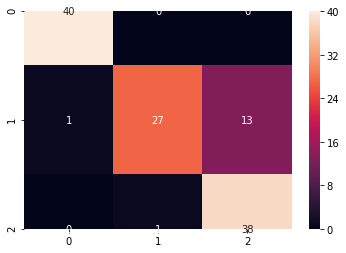

In [64]:
conf_m=confusion_matrix(y_train,y_pred_train)
print (conf_m)
sns.heatmap(conf_m, annot=True)
plt.show();

[[10  0  0]
 [ 1  0  8]
 [ 0  0 11]]


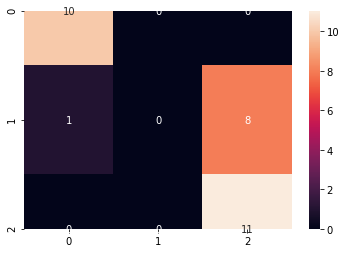

In [65]:
conf_m=confusion_matrix(y_test,y_pred_test)
print (conf_m)
sns.heatmap(conf_m, annot=True)
plt.show();

## Bonus: For each of the data sets in this lab, try training with some of the other models you have learned about, recalculate the evaluation metrics, and compare to determine which models perform best on each data set.